# Testing connection and read from DB on Docker Container

In [1]:
# Main Libs
import pandas as pd
import numpy as np

# DataViz Libs
import matplotlib.pyplot as plt
import seaborn as sns


# PSQL
import psycopg2

## Reading from `csv_extractions` dir

→ This data has been exported from a connection to Postrges Database running on the `db` Docker container.

In [2]:
pd.read_csv("../csv_extractions/customers_202207181304-sample_extraction.csv")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


## Reading from `psycopg2` connection and `pandas.read_sql`

**Creating the connection and cursos objects**

In [3]:
# Write connection string
conn_string = "dbname = olist_db user=postgres password=password host=localhost port=5432"

# Create a connection to the DB
conn = psycopg2.connect(conn_string)

# Create a cursos to interact with DB
cur = conn.cursor()

**Perform a simple SQL query:**

In [4]:
sql_query = "SELECT * FROM order_reviews;" 
    
order_reviews_df = pd.read_sql(sql_query, conn)
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01,2018-07-02 12:59:13


**Test a more advanced query:**

In [78]:
sql_query_month_paytype = """
WITH cte_payments AS (
    SELECT
        op.order_id,
        op.payment_type,
        op.payment_value,
        o.order_approved_at
    FROM
        order_payments op
    LEFT JOIN orders o ON
        o.order_id = op.order_id
    WHERE
        o.order_approved_at BETWEEN '2017-01-01' AND '2017-12-31'
    ORDER BY
        o.order_approved_at
)
SELECT
    EXTRACT(
        MONTH
    FROM
        order_approved_at
    ) AS purchase_month,
    payment_type,
    round( CAST( sum(payment_value) AS NUMERIC), 2 ) AS revenue
FROM
    cte_payments
GROUP BY
    purchase_month,
    cte_payments.payment_type
"""

In [79]:
df_agg_month_ptype = pd.read_sql(sql_query_month_paytype, conn)
df_agg_month_ptype.head(10)

,purchase_month,payment_type,revenue
0,1.0,boleto,18079.53
1,1.0,credit_card,109138.31
2,1.0,debit_card,743.53
3,1.0,voucher,3874.50
4,2.0,boleto,57571.97
5,2.0,credit_card,226406.64
6,2.0,debit_card,1510.32
7,2.0,voucher,6347.29
8,3.0,boleto,83900.94
9,3.0,credit_card,348938.05


**Plot `revenue` by `payment_type`**:

In [80]:
paytypes_list = df_agg_month_ptype['payment_type'].unique().tolist()

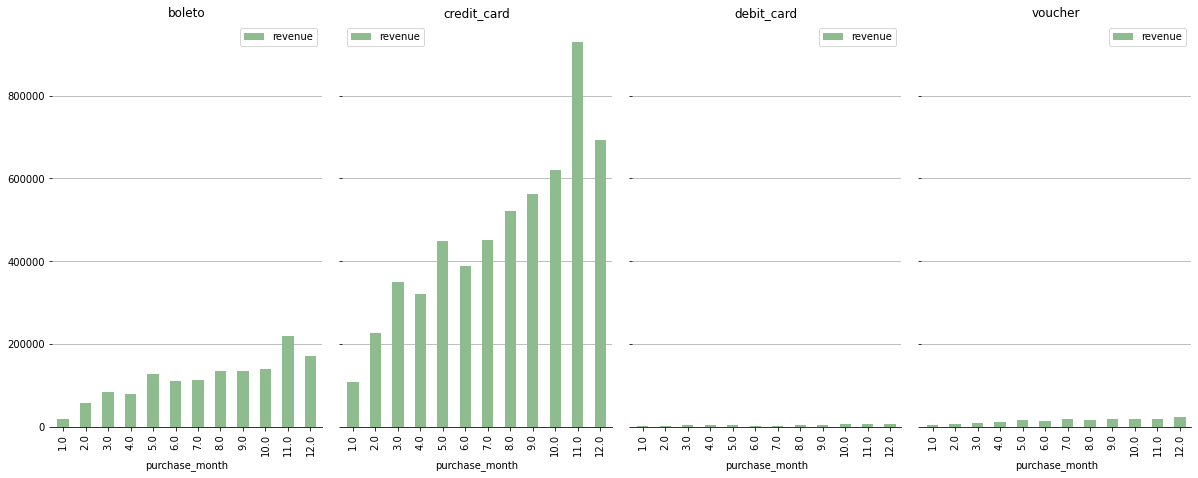

In [108]:
fig, ax = plt.subplots(1, len(paytypes_list), sharey = 'row', figsize = (17, 7))

for i, paytype in enumerate(paytypes_list): 
    # Iterate over axs for plotting
    (
        df_agg_month_ptype[df_agg_month_ptype["payment_type"] == paytype] 
            .set_index("purchase_month")
            .plot(kind = 'bar', ax = ax[i], title = paytype, color = "darkseagreen", zorder = 2)
            .grid(axis = "y", zorder = 1)
    )
    sns.despine(left = True)
    
plt.tight_layout(pad = 2)